# Reconocimiento de Actividades Humanas

En este laboratorio usaremos registro de actividades capturado por smartphones que fueron desarrolladas por 30 personas distintas. Entre las actividades se incluyen:

    1 WALKING
    2 WALKING_UPSTAIRS
    3 WALKING_DOWNSTAIRS
    4 SITTING
    5 STANDING
    6 LAYING

Al mismo tiempo, cada registro de la base de datos incluye las siguientes mediciones:ç

-  Aceleracion total y aceleracion del cuerpo estimada en los 3 ejes (X-Y-Z)
-  Velocidad angular del giroscopio en 3 los ejes (X-Y-Z)
-  Un vector de dimensionalidad 561 con descriptores derivados a partir de los datos de movimiento.
-  Etiqueta de actividad
-  Un identificador de la persona que ejecuta la actividad

Los datos originales se pueden encontrar en [este enlace](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones#)

Más información del dataset se encuentra en:

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False


print('Google Colab? ',IS_COLAB)

Google Colab?  True


In [56]:
if IS_COLAB:
    ! wget  -c "https://ucmcl-my.sharepoint.com/:u:/g/personal/shernandez_ucm_cl/EWvE2qLEt7lGkusfUcjYHnMBbtVOqIrdzY15Dnd2hHDUJA?e=NAeghv&download=1" -O HAR.tar.xz
    ! tar -xf HAR.tar.xz 

--2020-12-03 20:04:51--  https://ucmcl-my.sharepoint.com/:u:/g/personal/shernandez_ucm_cl/EWvE2qLEt7lGkusfUcjYHnMBbtVOqIrdzY15Dnd2hHDUJA?e=NAeghv&download=1
Resolving ucmcl-my.sharepoint.com (ucmcl-my.sharepoint.com)... 40.108.169.35
Connecting to ucmcl-my.sharepoint.com (ucmcl-my.sharepoint.com)|40.108.169.35|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/shernandez_ucm_cl/Documents/HAR.tar.xz?originalPath=aHR0cHM6Ly91Y21jbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9zaGVybmFuZGV6X3VjbV9jbC9FV3ZFMnFMRXQ3bEdrdXNmVWNqWUhuTUJidFZPcUlyZHpZMTVEbmQyaEhEVUpBP3J0aW1lPVNTWklzc2FYMkVn [following]
--2020-12-03 20:04:52--  https://ucmcl-my.sharepoint.com/personal/shernandez_ucm_cl/Documents/HAR.tar.xz?originalPath=aHR0cHM6Ly91Y21jbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9zaGVybmFuZGV6X3VjbV9jbC9FV3ZFMnFMRXQ3bEdrdXNmVWNqWUhuTUJidFZPcUlyZHpZMTVEbmQyaEhEVUpBP3J0aW1lPVNTWklzc2FYMkVn
Reusing existing connection to ucmcl-my.sharepoint.com:443.
HTTP reques

In [58]:
! ls HAR

x_test.npy  x_train.npy  y_test.npy  y_train.npy


In [59]:
import numpy as np

X_train=np.load('HAR/x_train.npy')
X_test=np.load('HAR/x_test.npy')
y_train=np.load('HAR/y_train.npy')
y_test=np.load('HAR/y_test.npy')

label_to_activity = {1: 'walking horizontally', 2: 'walking upstairs', 3: 'walking downstairs',
                     4: 'sitting', 5: 'standing', 6: 'laying'}

In [ ]:
y_train.shape

(7352, 1)

In [60]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [61]:
print(X_train.shape)

(7352, 128, 9)


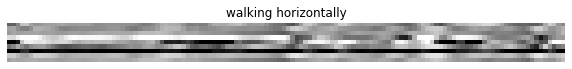

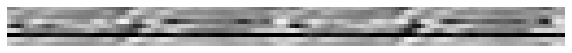

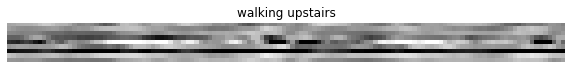

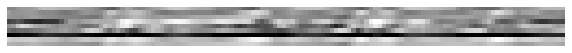

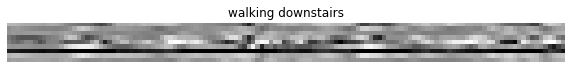

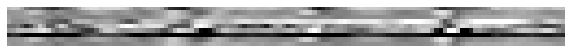

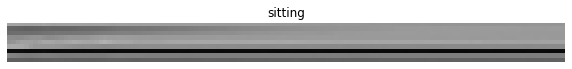

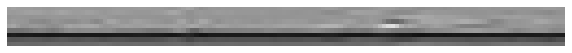

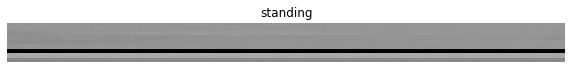

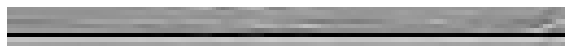

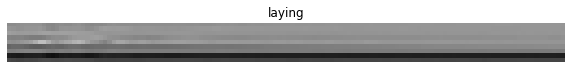

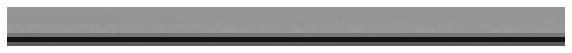

In [62]:
import matplotlib.pyplot as plt

def make_plots(num_examples_per_category):
    for label in range(1,7):
        x_label = X_train[y_train[:, 0] == label]
        for i in range(num_examples_per_category):
            fig, ax = plt.subplots(figsize=(10, 1))
            ax.imshow(x_label[100*i].T, cmap='Greys', vmin=-1, vmax=1)
            ax.axis('off')
            if i == 0:
                ax.set_title(label_to_activity[label])
            plt.show()
        
make_plots(2)

In [63]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dense

model = keras.models.Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(32,activation="relu"),
    Dense(6,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                36896     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


In [64]:
y_train_onehot=to_categorical(y_train-1)
y_test_onehot=to_categorical(y_test-1)

In [66]:
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot,epochs=100, verbose=1)
score = model.evaluate(X_test, y_test_onehot, verbose=0)

Epoch 1/100
230/230 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.6748
Epoch 2/100
230/230 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8649
Epoch 3/100
230/230 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8957
Epoch 4/100
230/230 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9093
Epoch 5/100
230/230 [==============================] - 1s 2ms/step - loss: 0.2175 - accuracy: 0.9214
Epoch 6/100
230/230 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9275
Epoch 7/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9350
Epoch 8/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9376
Epoch 9/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1675 - accuracy: 0.9411
Epoch 10/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1594 - accura

In [67]:
print('validation loss : {0:0.2f}, validation accuracy : {1:0.2f}'.format(*score))

validation loss : 0.62, validation accuracy : 0.86


Text(0.5, 1.0, 'accuracy')

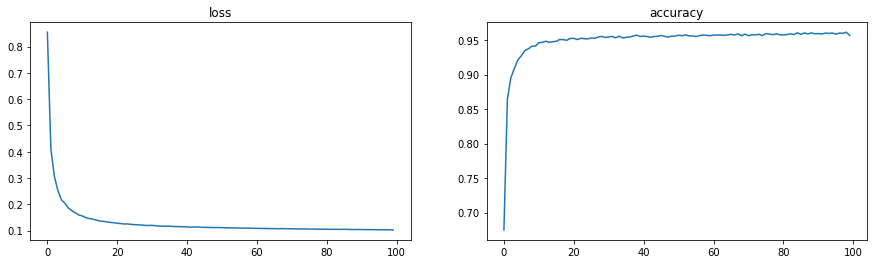

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('accuracy')

In [75]:
from tensorflow.keras.layers import Flatten,Dense,SimpleRNN

rnn_model = keras.models.Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=X_train.shape[1:]),
    SimpleRNN(32),
    Dense(6,activation="softmax")
])

In [76]:
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128, 32)           1344      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 3,622
Trainable params: 3,622
Non-trainable params: 0
_________________________________________________________________


In [77]:
rnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = rnn_model.fit(X_train, y_train_onehot,epochs=100, verbose=1)
score = rnn_model.evaluate(X_test, y_test_onehot, verbose=0)

Epoch 1/100
230/230 [==============================] - 36s 155ms/step - loss: 1.5009 - accuracy: 0.4142
Epoch 2/100
230/230 [==============================] - 34s 149ms/step - loss: 1.2584 - accuracy: 0.5241
Epoch 3/100
230/230 [==============================] - 33s 145ms/step - loss: 1.1699 - accuracy: 0.5420
Epoch 4/100
230/230 [==============================] - 35s 153ms/step - loss: 1.0497 - accuracy: 0.5949
Epoch 5/100
230/230 [==============================] - 33s 142ms/step - loss: 0.9264 - accuracy: 0.6530
Epoch 6/100
230/230 [==============================] - 35s 150ms/step - loss: 0.9483 - accuracy: 0.6171
Epoch 7/100
230/230 [==============================] - 34s 150ms/step - loss: 0.7662 - accuracy: 0.6752
Epoch 8/100
230/230 [==============================] - 34s 147ms/step - loss: 0.6993 - accuracy: 0.6923
Epoch 9/100
230/230 [==============================] - 35s 153ms/step - loss: 0.6718 - accuracy: 0.7038
Epoch 10/100
230/230 [==============================] - 34s 150m